In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import imutils

import random as rn
from random import shuffle
from zipfile import ZipFile
from PIL import Image
from skimage.feature import hog
from skimage import feature, color, data
from skimage.io import imread, imshow
from skimage.feature import hog
from sklearn import datasets
from skimage import exposure
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [33]:
trn_img_path = "/content/drive/MyDrive/Datasets/Brain Tumor/archive (3)/Training"
# Now for the testing data
tst_img_path = "/content/drive/MyDrive/Datasets/Brain Tumor/archive (3)/Testing"
# Lets create 2 set of arrays for train & testing data's.
# One for to store the Image data and anther one for label details
X_train =[] # Stores the training image features
label_train = [] # Stores the training image labels
X_test = [] # Stores the testing image features
label_test = [] # Stores the testing image label
tumor_label=['pituitary', 'meningioma', 'glioma']

Binary Threshold

(439, 645, 3)


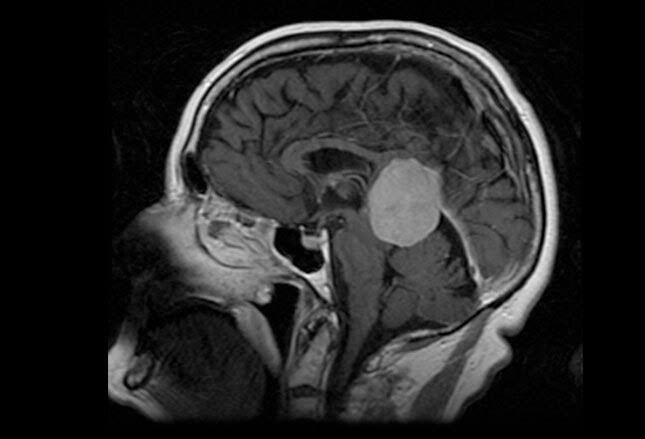

(439, 645)


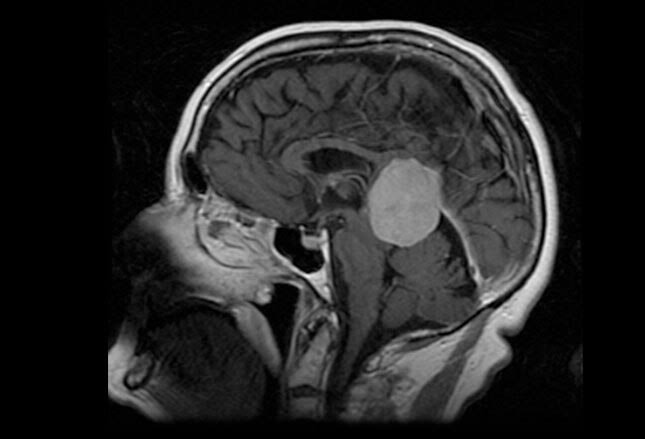

(439, 645)


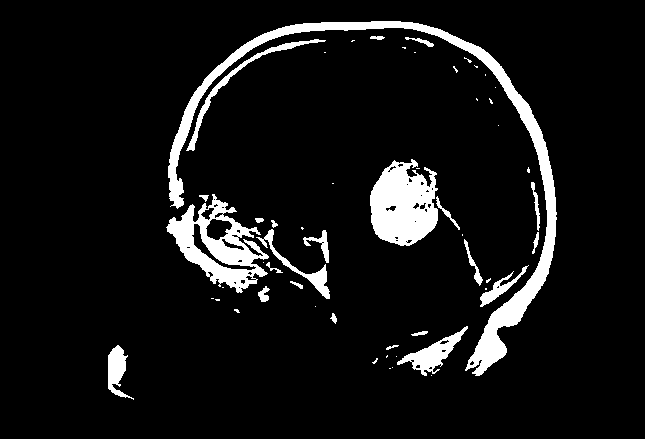

(439, 645)


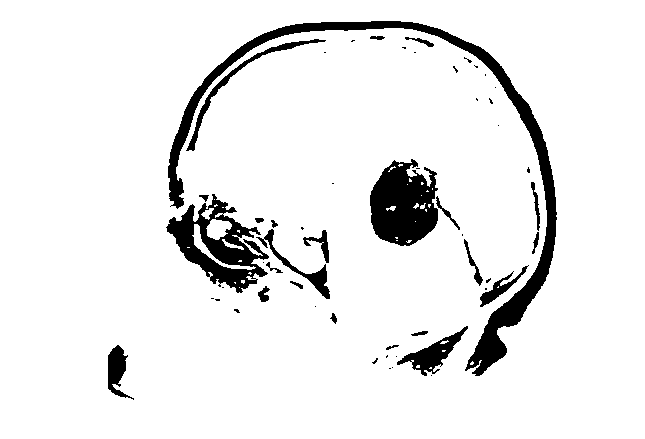

In [34]:
img=cv2.imread('/content/drive/MyDrive/Datasets/Brain Tumor/Pred/Te-me_0058.jpg')
print(img.shape)
cv2_imshow(img)

gray1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray1.shape)
cv2_imshow(gray1)

ret,thresh1=cv2.threshold(gray1,130,255,cv2.THRESH_BINARY)
print(thresh1.shape)
cv2_imshow(thresh1)

ret,thresh1=cv2.threshold(gray1,130,255,cv2.THRESH_BINARY_INV)
print(thresh1.shape)
cv2_imshow(thresh1)

Sharpened Image

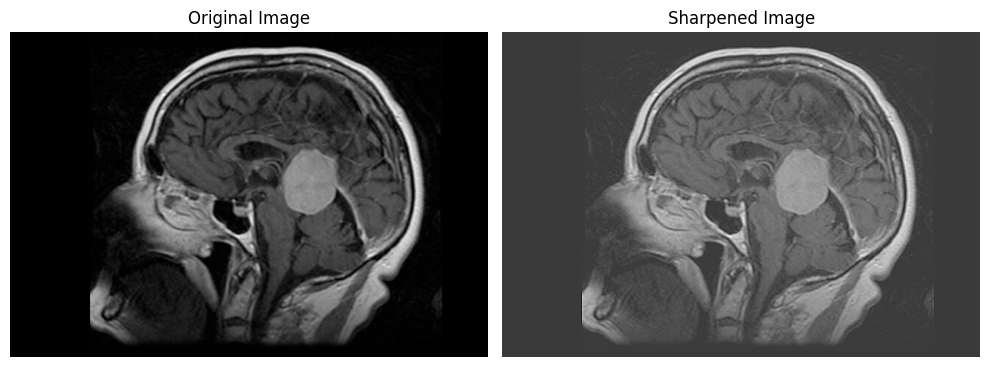

In [35]:
from matplotlib import pyplot as plt
import cv2

# Load the image using the provided path
image_path = '/content/drive/MyDrive/Datasets/Brain Tumor/Pred/Te-me_0058.jpg'
image = cv2.imread(image_path)
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply Laplacian filter for sharpening
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
sharpened_image = gray_image - 0.5 * laplacian  # Adjust the factor as desired
# Display the original and sharpened images side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')  # Display as grayscale
plt.axis('off')
plt.title('Sharpened Image')

plt.tight_layout()
plt.show()

Denoised Image

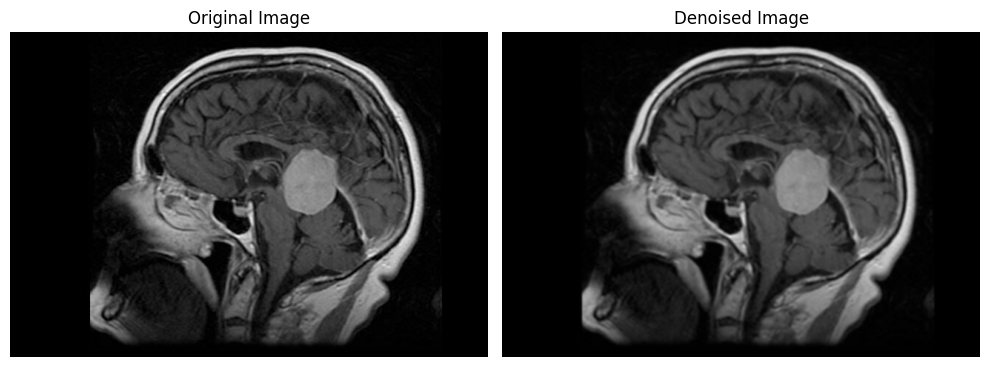

In [36]:
from matplotlib import pyplot as plt
import cv2

# Load the image using the provided path
image_path = '/content/drive/MyDrive/Datasets/Brain Tumor/Pred/Te-me_0058.jpg'
image = cv2.imread(image_path)

# Apply Gaussian denoising
denoised_image = cv2.GaussianBlur(image, (5, 5), 0)

# Display the original and denoised images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Denoised Image')

plt.tight_layout()
plt.show()

Histo Flatten

[[ 1  2  2  2 10]
 [10 20 30 40 50]]
[ 1  2  2  2 10 10 20 30 40 50]
[ 1  2  2  2 10 10 20 30 40 50]


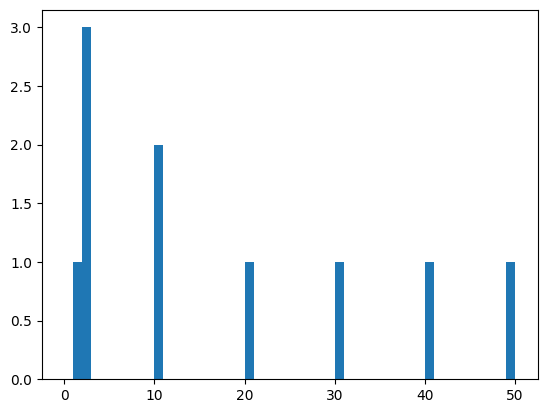

In [37]:
img=cv2.imread('/content/drive/MyDrive/Datasets/Brain Tumor/Pred/Te-me_0058.jpg')
img=np.array([[1,2,2,2,10],[10,20,30,40,50]])
print(img)
print(img.ravel())
print(img.flatten())
plt.hist(img.ravel(),bins = 50, range = [0, 50])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

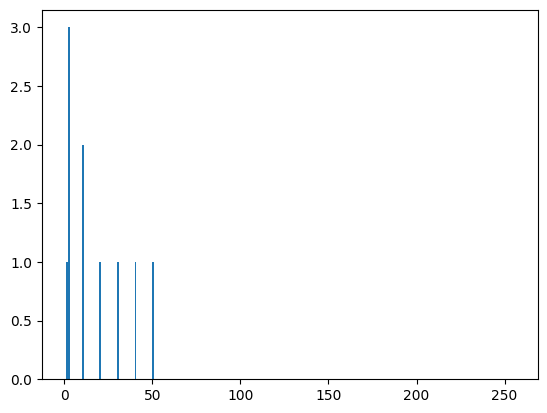

In [38]:
plt.hist(img.ravel(),bins = 256, range = [0, 256])
plt.show

Canny

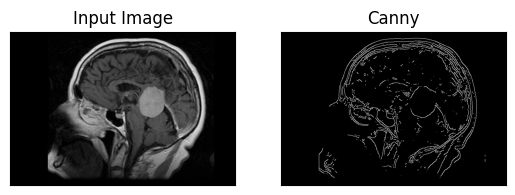

In [39]:
img=cv2.imread('/content/drive/MyDrive/Datasets/Brain Tumor/Pred/Te-me_0058.jpg')
canny = cv2.Canny(img, 150, 150)

titles = ['Input Image', 'Canny']
images = [img, canny]
for i in range(2):
  plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

Hog feature

<ipython-input-40-45068e0d246c>:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hogfv, hog_image = hog(img, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2),


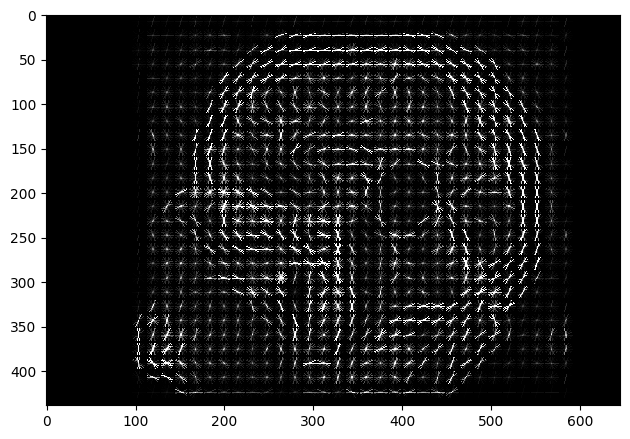

In [40]:
img=cv2.imread('/content/drive/MyDrive/Datasets/Brain Tumor/Pred/Te-me_0058.jpg')
imshow(img)
MC=True #For Color Images
#MC=False #For Grayscale Images

hogfv, hog_image = hog(img, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2),
                       visualize=True, multichannel=MC)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 5))
imshow(hog_image_rescaled)

In [41]:
hog_images = []
hog_features = []
def hog_data_extractor(jpeg_path):
    jpeg_data = cv2.imread(jpeg_path)
    jpeg_data=cv2.resize(jpeg_data,(150,150))
    fd, hog_image = hog(jpeg_data, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    return fd

In [42]:
def jpeg_to_array (tumor_type, img_root_path,data_type):
    tumor_path = os.path.join(img_root_path,tumor_type.lower())
    print('Loading ' + data_type +' images for tumor type '+tumor_type)
    for img in os.listdir(tumor_path):
        img_path = os.path.join(tumor_path,img)
        if img_path.endswith('.jpg'):
            if(data_type == 'Training'):
                X_train.append(hog_data_extractor(img_path))
                label_train.append(str(tumor_type))
            if(data_type =='Testing'):
                X_test.append(hog_data_extractor(img_path))
                label_test.append(np.array(str(tumor_type)))

In [43]:
[jpeg_to_array(tumor,trn_img_path,'Training')for tumor in tumor_label]
len(X_train)
[jpeg_to_array(tumor,tst_img_path,'Testing')for tumor in tumor_label]
len(X_test)

Loading Training images for tumor type pituitary
Loading Training images for tumor type meningioma
Loading Training images for tumor type glioma
Loading Testing images for tumor type pituitary
Loading Testing images for tumor type meningioma
Loading Testing images for tumor type glioma


906

In [44]:
le = LabelEncoder()
y_train = le.fit_transform(label_train)
y_test = le.fit_transform(label_test)

Random Forest Algo

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20, random_state=40)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, random_state=40)

In [46]:
y_RF = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y_RF))

Accuracy on unknown data is 0.8807947019867549


In [47]:
print(classification_report(y_true = y_test, y_pred = y_RF, target_names= ['pituitary','meningioma', 'glioma']))

              precision    recall  f1-score   support

   pituitary       0.93      0.79      0.85       300
  meningioma       0.82      0.89      0.85       306
      glioma       0.91      0.96      0.93       300

    accuracy                           0.88       906
   macro avg       0.89      0.88      0.88       906
weighted avg       0.88      0.88      0.88       906



KNN Algo

In [48]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [49]:
y_knn = neigh.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y_knn))

Accuracy on unknown data is 0.8344370860927153


SVM Algo

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0,tol=1e-5)
lsvc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

In [51]:
y_svm = lsvc.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y_svm))

Accuracy on unknown data is 0.8719646799116998


Predict Tumor

In [52]:
def tumor_predict(img_path):
    image = cv2.imread(img_path)
    ip_image = Image.open(img_path)
    image = cv2.resize(image,(150,150))
    prd_image_data = hog_data_extractor(img_path)
    tumor_predicted = clf.predict(prd_image_data.reshape(1, -1))[0]
    fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow(ip_image)
    ax[0].set_title('Input image')

    ax[1].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    ax[1].set_title('The predicted image is:'+ tumor_label[tumor_predicted]);

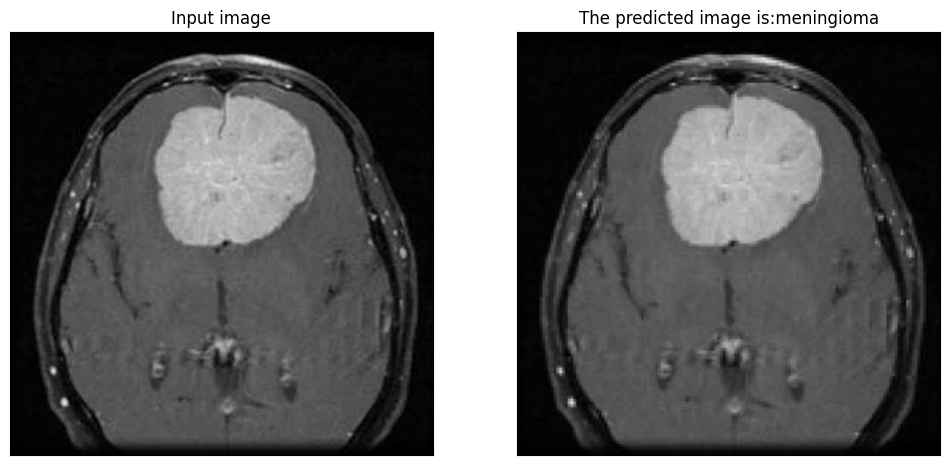

In [53]:
ip_img_folder = "/content/drive/MyDrive/Datasets/Brain Tumor/Pred"
ip_img_files = ['Te-me_0068.jpg']
tumor_predicted = [tumor_predict(os.path.join(ip_img_folder,img_file))for img_file in ip_img_files]